In [1]:
%matplotlib inline
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 100
x0 = 0.
xf = 1.
g0 = 0.
gf = 0.
h = (xf-x0)/float(N+1)
b = np.zeros(N)
u = np.zeros(N)
A = np.zeros((N,N))

### Gaussian Elimination

In [3]:
for i in range(N):                        #  Build A
    for j in range(N):
        if i==j:
            A[i,j] = 2.
        if (i==(j+1)) or ((i+1)==j):
            A[i,j] = -1.
def f(x):                                  #  Forcing term
    return np.sin(5*x)
b[0] = g0 + h**2*f(x0+h)
b[-1]= gf + h**2*f(x0+N*h)

for i in range(1,N-1):                    # Building B
    b[i] = h**2*f(x0 + h*(i+1))  
    
a = np.concatenate((np.array([0.]),np.array([A[i+1,i] for i in range(A.shape[0]-1)])))
d = np.array([A[i,i] for i in range(A.shape[0])])
c = np.concatenate((np.array([A[i,i+1] for i in range(A.shape[0]-1)]),np.array([0.])))
for i in range(1,A.shape[0]):
    m = a[i]/d[i-1]
    d[i] = d[i] - m*c[i-1]
    b[i] = b[i] - m*b[i-1]
u[-1] = b[-1]/d[-1]
for i in range(N-1)[::-1]:
    u[i] = (b[i] - c[i]*u[i+1])/d[i]
u = np.append(np.append(g0,u),gf)

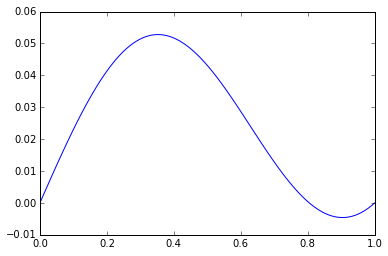

In [4]:
plt.plot([x0+h*i for i in range(N+2)],u)

### Iterative Methods

#### Initial Guess

In [11]:
x = [f(i*h) for i in range(N+2)]    # Initial Guess  Jacobi
xold = [0 for i in range(N+2)]
xnew = [0 for i in range(N+2)]

y = [f(i*h) for i in range(N+2)]    # Initial Guess  Gauss-Seidel

t = [x0+h*i for i in range(N+2)]    # mesh steps
x[0], x[-1], y[0], y[-1] = 0, 0, 0, 0

### Jacobi vs Gauss - Seidel

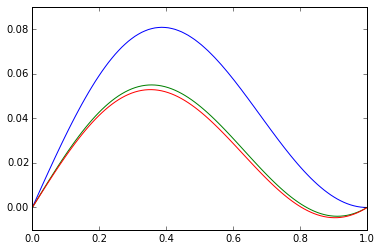

In [26]:
for iterations in range(1000):
    xold = x[:]
    for i in range(1,N+1):
        ax = xold[i-1] + xold[i+1]
        xnew[i] = 1/2.*(h**2*f(i*h) + ax)
    x = xnew[:]
    
    for i in range(1,N+1):
        ax = y[i-1] + y[i+1]
        y[i] = 1/2.*(h**2*f(i*h) + ax)
        
plt.plot(t,x,t,y,t,u)

### Gauss Seidel 3D

In [33]:
import timeit

N = 40

def function(x,y,z):
    return np.sin(5*x+5*y+5*z)
z = np.zeros((N+2,N+2,N+2))
for i in range(1,N+1):
    for j in range(1,N+1):
        for k in range(1,N+1):
            z[i,j,k] = function(i*h,j*h,k*h)

In [39]:
start = timeit.default_timer()
for iterations in range(1):
    for i in range(1,N+1):
        for j in range(1,N+1):
            for k in range(1,N+1):
                az=z[i-1,j,k]+z[i+1,j,k]+z[i,j-1,k]+z[i,j+1,k]+z[i,j,k+1]+z[i,j,k-1]
                z[i,j,k] = 1/6.*(h**2*function(i*h,j*h,k*h) + az)
stop = timeit.default_timer()
print stop - start

0.515502929688
